<a href="https://colab.research.google.com/github/wahyupratama18/PCVK_Genap_2022/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import glob
from math import log10, sqrt

Image Gamma Correction
----------------------
Set value:1


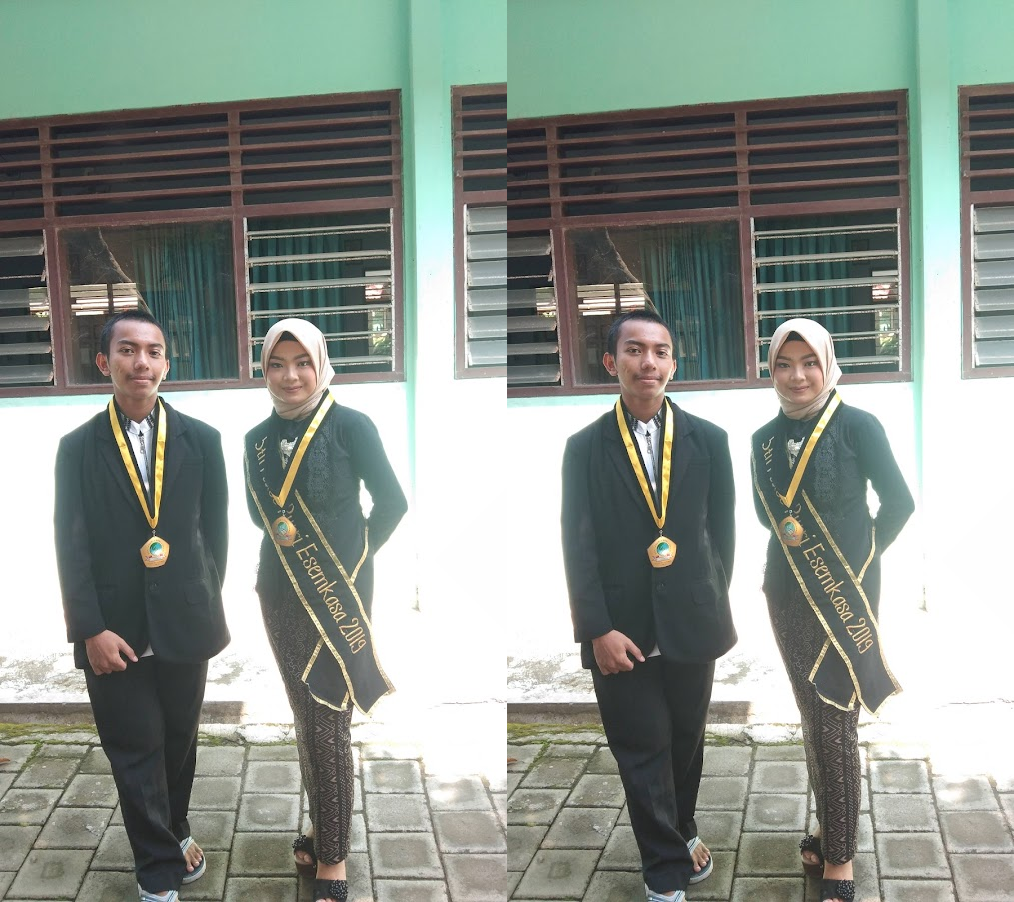

In [8]:
print('Image Gamma Correction')
print('----------------------')

try:
  gamma = int(input('Set value:'))
except ValueError:
  print('NaN')

img = cv.imread('/content/drive/MyDrive/Classroom/PCVK/Rika.jpg')
imGamma = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      imGamma[y,x,c] = np.clip(255 * pow(img[y,x,c] / 255, (1 / gamma)), 0, 255)

final = cv.hconcat((img, imGamma))
cv2_imshow(final)

Image Depth Simulation
--------------------------
Masukkan nilai Bit Depth: 3


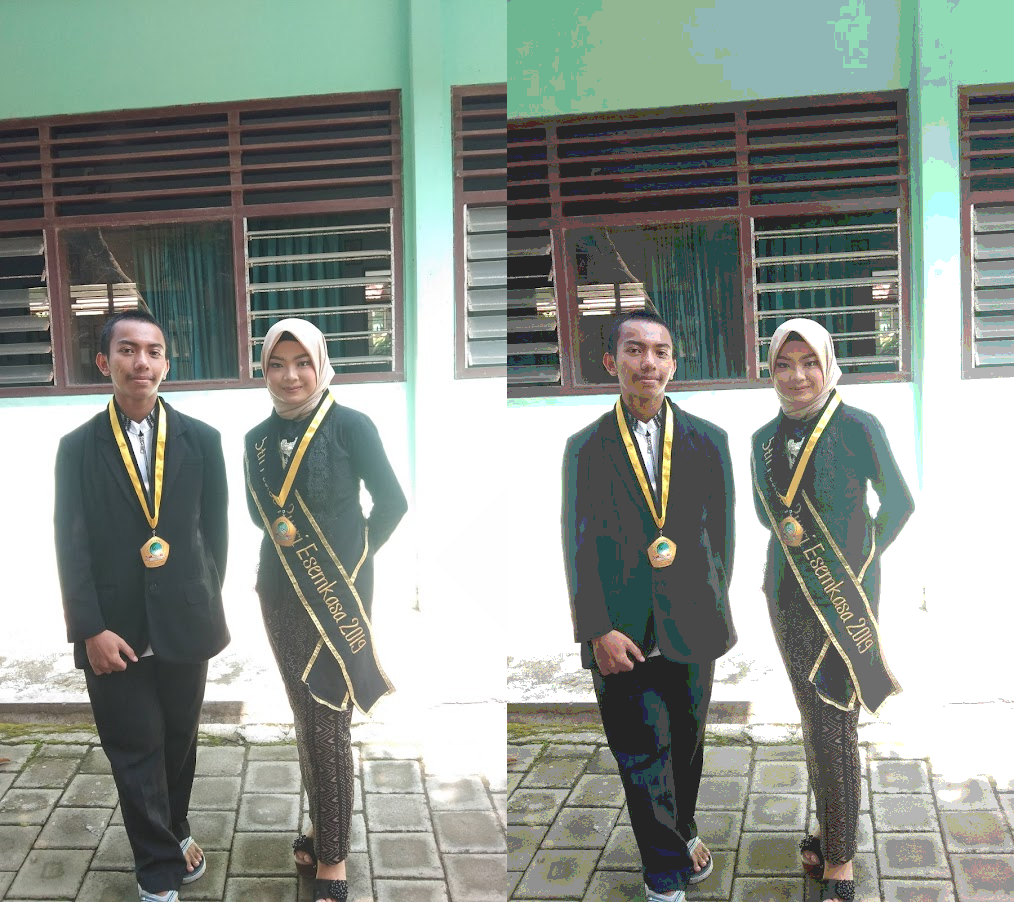

In [9]:
print('Image Depth Simulation')
print('--------------------------')
try:
  depth = float(input('Masukkan nilai Bit Depth: '))
except ValueError:
  print('NaN')

imGamma = np.zeros(img.shape, img.dtype)

bit = 2 ** depth
level = 255 / (bit-1)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      imGamma[y,x,c] = np.clip(round(img[y,x,c] / level) * level, 0, 255)

final = cv.hconcat((img, imGamma))
cv2_imshow(final)

Nilai PSNR dengan noise  5  adalah 27.23972126702617 (dB)


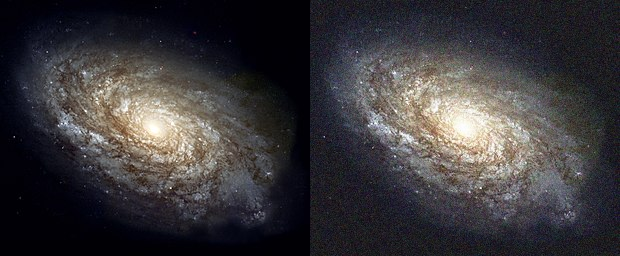

Nilai PSNR dengan noise  30  adalah 27.199624593640046 (dB)


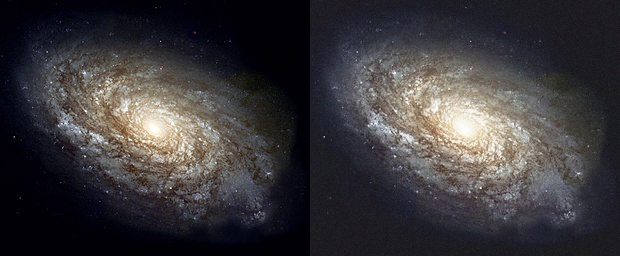

Nilai PSNR dengan noise  60  adalah 27.206755952560275 (dB)


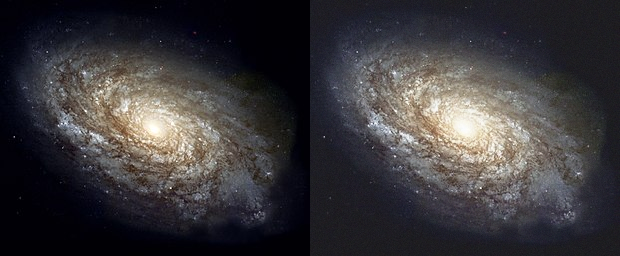

Nilai PSNR dengan noise  80  adalah 27.212820250069008 (dB)


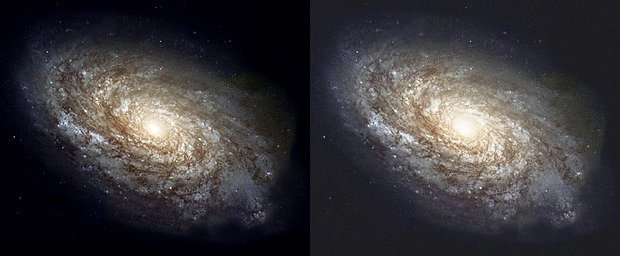

Nilai PSNR dengan noise  100  adalah 27.21748674712924 (dB)


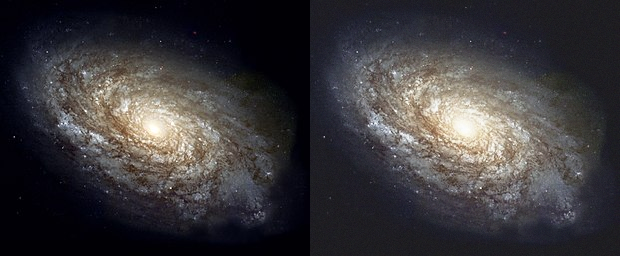

In [37]:
original = cv.imread('/content/drive/MyDrive/Classroom/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Classroom/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

def PSNR(original, compressed): 
  mse = np.mean(original - compressed ** 2) 

  if(mse == 0):  
    return 100

  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse)) 
  return psnr

def looped(noise_number):
  dst = cv_img[0]

  for i in range(noise_number):
    if i == 0:
      pass
    else:
      alpha = 1.0 / (i + 1)
      beta = 1.0 - alpha
      dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)
  
  compressed = dst
  psnr = PSNR(original, compressed)

  print('Nilai PSNR dengan noise ',noise_number + 1,' adalah',psnr,'(dB)')
  galaxy_frame = cv.hconcat((original, dst))
  cv2_imshow(galaxy_frame)

looped(4)
looped(29)
looped(59)
looped(79)
looped(99)

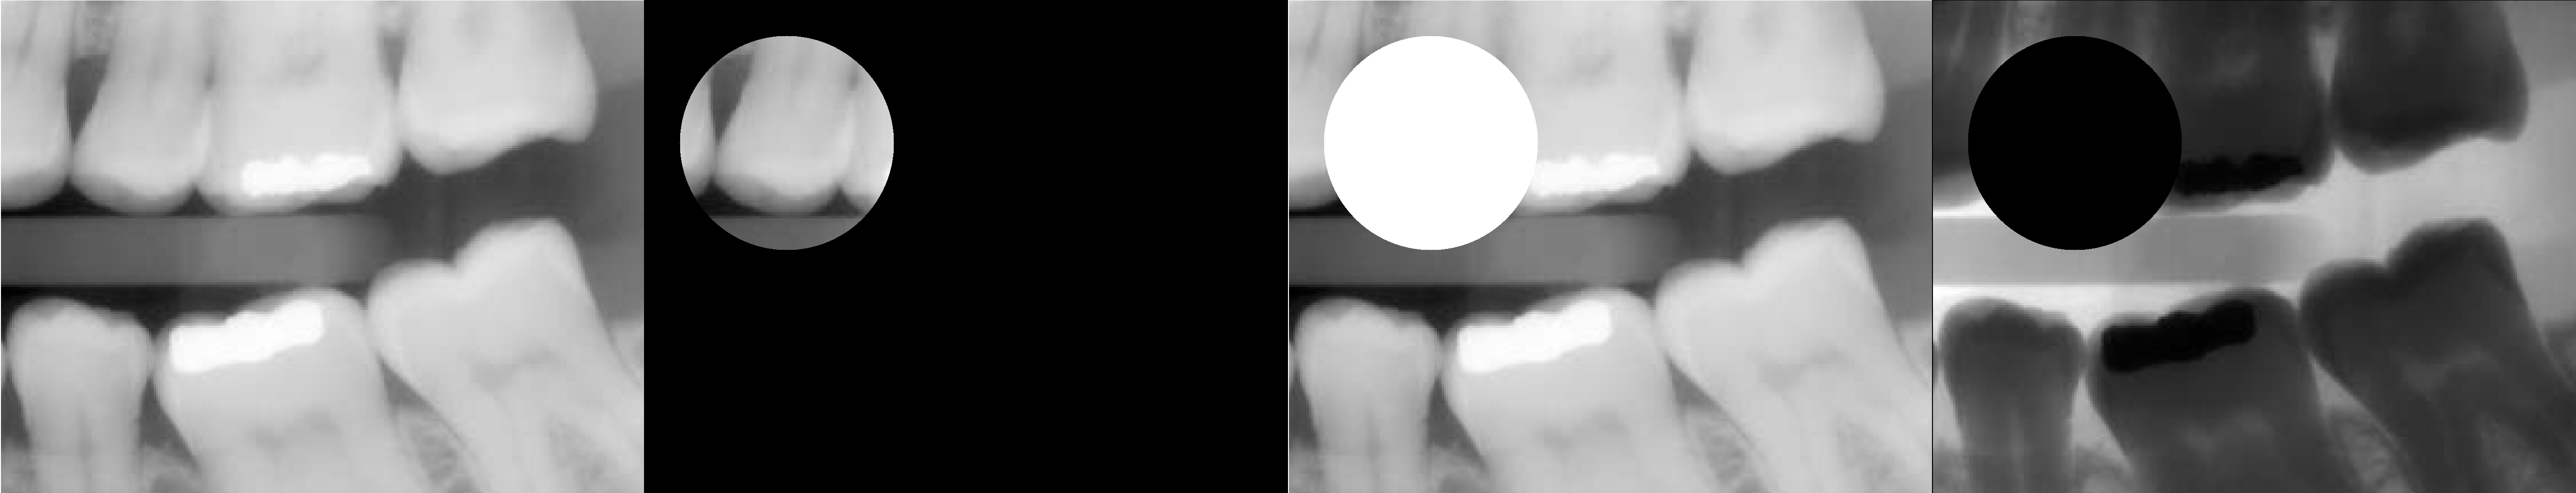

In [25]:
teeth = cv.imread('/content/drive/MyDrive/Classroom/PCVK/teeth.jpg')

mask = np.zeros(teeth.shape, dtype=np.uint8)
mask = cv.circle(mask, (300,300), 225, (255,255,255), -1)

funcAnd = teeth & mask
funcOr = teeth | mask
funcNot = ~teeth & ~mask

teeth_frame = cv.hconcat((teeth, funcAnd, funcOr, funcNot))
cv2_imshow(teeth_frame)